In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
import seaborn as sns
sns.set_style("darkgrid")


In [2]:
df1= pd.read_csv('Bengaluru_House_Data.csv')
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df1.shape

(13320, 9)

In [4]:
df1.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [5]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [6]:
df1['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [7]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True    
            

In [8]:
df1[~df1['total_sqft'].apply(is_float)].head(15)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
30,Super built-up Area,19-Dec,Yelahanka,4 BHK,LedorSa,2100 - 2850,4.0,0.0,186.000
56,Built-up Area,20-Feb,Devanahalli,4 Bedroom,BrereAt,3010 - 3410,NaN,NaN,192.000
81,Built-up Area,18-Oct,Hennur Road,4 Bedroom,Gollela,2957 - 3450,NaN,NaN,224.500
122,Super built-up Area,18-Mar,Hebbal,4 BHK,SNontle,3067 - 8156,4.0,0.0,477.000
137,Super built-up Area,19-Mar,8th Phase JP Nagar,2 BHK,Vaarech,1042 - 1105,2.0,0.0,54.005
165,Super built-up Area,18-Dec,Sarjapur,2 BHK,Kinuerg,1145 - 1340,2.0,0.0,43.490
188,Super built-up Area,Ready To Move,KR Puram,2 BHK,MCvarar,1015 - 1540,2.0,0.0,56.800
224,Super built-up Area,19-Dec,Devanahalli,3 BHK,Jurdsig,1520 - 1740,NaN,NaN,74.820
410,Super built-up Area,Ready To Move,Kengeri,1 BHK,NaN,34.46Sq. Meter,1.0,0.0,18.500
549,Super built-up Area,18-Sep,Hennur Road,2 BHK,Shxorm,1195 - 1440,2.0,0.0,63.770


In [9]:
# total_sqft has defferent types like in sqft meter, cents so conver all dimension into sqft 
import re
def preprocess_total_sqft(my_list):
    if len(my_list) == 1:
        
        try:
            return float(my_list[0])
        except:
            strings = ['Sq. Meter', 'Sq. Yards', 'Perch', 'Acres', 'Cents', 'Guntha', 'Grounds']
            split_list = re.split('(\d*.*\d)', my_list[0])[1:]
            area = float(split_list[0])
            type_of_area = split_list[1]
            
            if type_of_area == 'Sq. Meter':
                area_in_sqft = area * 10.7639
            elif type_of_area == 'Sq. Yards':
                area_in_sqft = area * 9.0
            elif type_of_area == 'Perch':
                area_in_sqft = area * 272.25
            elif type_of_area == 'Acres':
                area_in_sqft = area * 43560.0
            elif type_of_area == 'Cents':
                area_in_sqft = area * 435.61545
            elif type_of_area == 'Guntha':
                area_in_sqft = area * 1089.0
            elif type_of_area == 'Grounds':
                area_in_sqft = area * 2400.0
            return float(area_in_sqft)
        
    else:
        return (float(my_list[0]) + float(my_list[1]))/2.0

In [10]:
df1['total_sqft'] = df1.total_sqft.str.split('-').apply(preprocess_total_sqft)
df1.head(15)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200.0,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170.0,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732.0,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300.0,4.0,NaN,600.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310.0,3.0,1.0,63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020.0,6.0,NaN,370.00


In [11]:
# checking missing value in dataset
df1.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

## Missing Value visulization

2.0        0.383859
1.0        0.367643
3.0        0.125526
0.0        0.077252
missing    0.045721
Name: balcony, dtype: float64


[Text(0.5, 1.0, 'Missing Value Visualization For Training Dataset \n Column : Balcony')]

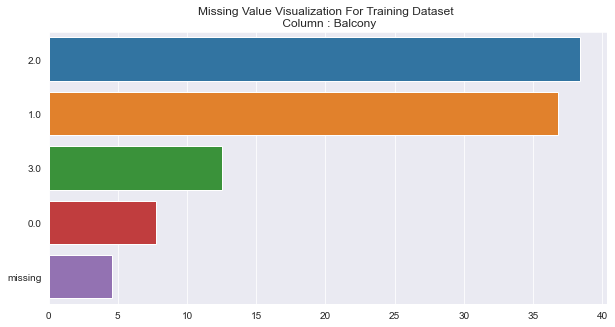

In [15]:
fig, ax = plt.subplots(figsize=(10, 5))
train_couts = df1['balcony'].fillna('missing').value_counts(normalize=True)
print(train_couts)
sns.barplot(y = train_couts.index, x= train_couts.values*100)
ax.set(title='Missing Value Visualization For Training Dataset \n Column : Balcony')

[Text(0.5, 1.0, 'Missing Value Visualization For Training Dataset \n Column : Bath')]

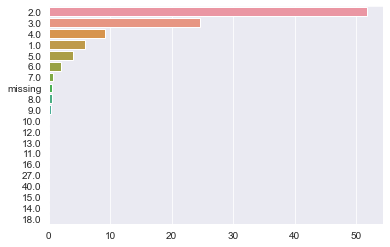

In [25]:
train_counts = df1['bath'].fillna('missing').value_counts(normalize=True)
#print(train_counts)
sns.barplot(y = train_counts.index, x= train_counts.values*100)
ax.set(title='Missing Value Visualization For Training Dataset \n Column : Bath')

[Text(0.5, 1.0, 'Missing Value Visualization \n Column : Area Type')]

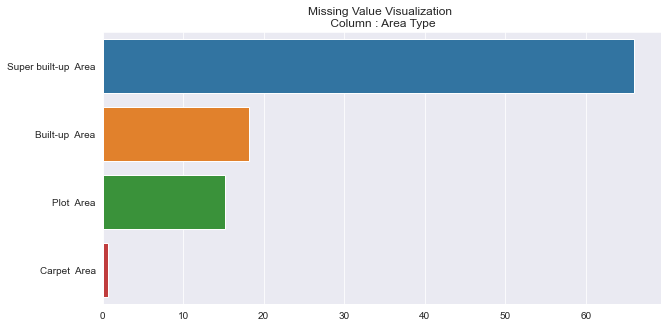

In [28]:
fig, ax = plt.subplots(figsize=(10, 5))
train_counts = df1['area_type'].fillna('missing').value_counts(normalize=True)
g=sns.barplot(y = train_counts.index, x= train_counts.values*100)
ax.set(title='Missing Value Visualization \n Column : Area Type')

In [31]:
df1['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [32]:
# get no of bedrooms from size columns
df2=df1.dropna(subset=['size'])
df2['no_of_bedrooms']=df2['size'].apply(lambda x:int(x.split(' ')[0]))

C:\Users\dell\AppData\Local\Temp/ipykernel_11484/1322516020.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['no_of_bedrooms']=df2['size'].apply(lambda x:int(x.split(' ')[0]))


In [33]:
df2.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,no_of_bedrooms
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440.0,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200.0,2.0,1.0,51.00,2


In [36]:
df2['no_of_bedrooms'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [37]:
# checking missing value in dataset
df2.isnull().sum()

area_type            0
availability         0
location             1
size                 0
society           5499
total_sqft           0
bath                57
balcony            593
price                0
no_of_bedrooms       0
dtype: int64

In [38]:
print("percentage of Missing Values Society Column In Train dataset :")
int(5499/df2.shape[0]*100)

percentage of Missing Values Society Column In Train dataset :


41

In [39]:
# society columns has more than 40% null values and availability column is not relavant so we drop those features
df2=df2.drop(['availability','society'],axis='columns')
df2.head()

,area_type,location,size,total_sqft,bath,balcony,price,no_of_bedrooms
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2


In [40]:
# checking missing value in dataset
df2.isnull().sum()

area_type           0
location            1
size                0
total_sqft          0
bath               57
balcony           593
price               0
no_of_bedrooms      0
dtype: int64

In [41]:
print(df2.shape)
df2.groupby('bath')['bath'].agg('count').sort_values(ascending=False)

(13304, 8)


bath
2.0     6908
3.0     3286
4.0     1226
1.0      788
5.0      524
6.0      273
7.0      102
8.0       64
9.0       43
10.0      13
12.0       7
11.0       3
13.0       3
16.0       2
14.0       1
15.0       1
18.0       1
27.0       1
40.0       1
Name: bath, dtype: int64

In [43]:
# More than 50% has mode value as bath .Assign mode value of bath columns to missing values in bath columns
bath_mode = df2['bath'].mode()[0]
df2.loc[df2['bath'].isna(), 'bath']=bath_mode
df2.isnull().sum()

area_type           0
location            1
size                0
total_sqft          0
bath                0
balcony           593
price               0
no_of_bedrooms      0
dtype: int64

In [44]:
# Handle balcony column
df2.balcony.unique()

array([ 1.,  3., nan,  2.,  0.])

In [45]:
balcony_med = df2['balcony'].median()
df2.loc[df2['balcony'].isna(), 'balcony'] = balcony_med
df2.isnull().sum()

area_type         0
location          1
size              0
total_sqft        0
bath              0
balcony           0
price             0
no_of_bedrooms    0
dtype: int64

In [46]:
df2=df2.dropna()
df2.shape

(13303, 8)

In [47]:
# Add new feature price per sqft 
df2['price_per_sqft'] = df2['price']*100000/df2['total_sqft']
df2.head()

,area_type,location,size,total_sqft,bath,balcony,price,no_of_bedrooms,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


In [49]:
# Explore location column 
df2['location']=df2.location.apply(lambda x:x.strip())
location_stats=df2.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield               540
Sarjapur  Road           397
Electronic City          304
Kanakpura Road           273
Thanisandra              237
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [51]:
# put all locations as 'other' category is it occures less than 10
location_stats_less_than_10=location_stats[location_stats<=10]
df2['location']=df2.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x )

In [56]:
#len(df2['location'].unique())

242

In [57]:
#remove sqft per badroom < 300
df3=df2[~(df2.total_sqft/df2.no_of_bedrooms<300)]
df3.shape

(12555, 9)

In [58]:
df3.price_per_sqft.describe()

count     12555.000000
mean       6297.884049
std        4161.953299
min           2.257423
25%        4206.383623
50%        5292.682927
75%        6916.831357
max      176470.588235
Name: price_per_sqft, dtype: float64

In [59]:
# There is huge variation in price_per_sqft for same location so we can remove outlier by using std and mean

def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df4 = remove_pps_outliers(df3)
df4.shape

(10315, 9)

In [60]:
df4[df4.bath>df4.no_of_bedrooms+2]

,area_type,location,size,total_sqft,bath,balcony,price,no_of_bedrooms,price_per_sqft
1640,Built-up Area,Chikkabanavar,4 Bedroom,2460.0,7.0,2.0,80.0,4,3252.032520
5283,Built-up Area,Nagasandra,4 Bedroom,7000.0,8.0,2.0,450.0,4,6428.571429
6766,Super built-up Area,Thanisandra,3 BHK,1806.0,6.0,2.0,116.0,3,6423.034330
8477,Super built-up Area,other,6 BHK,11338.0,9.0,1.0,1000.0,6,8819.897689


In [61]:
#It is unusual to have 2 more bathrooms than number of bedrooms in a home so we remove that outlier
df5=df4[df4.bath<=df4.no_of_bedrooms+2]
print(df5.shape)
df5.bath.unique()

(10311, 9)


array([ 4.,  3.,  2.,  5.,  1.,  8.,  6.,  7.,  9., 12., 16., 13.])

In [62]:
df5.to_csv('bangalore_house_data_cleaned.csv',index=False)